In [1]:
:ext QuasiQuotes
import qualified H.Prelude as H
H.initialize H.defaultConfig
[r| require("ggplot2") |]

Loading required package: ggplot2
0x00007f452c00a250

### Bayes Explorations for a Newbie

I'm trying to learn the fundamentals of Bayes. It seems like a very wide subject. My main interest would be applying
it to AI but I wanted to start from the basics.

When I was learning probability, to check my answers, I would write a Haskell program
to simulate the problem and compare it's anwer to my math answer. It was a great help
in building my confidence.

So, I thought I would do the same thing while learning Bayes.

I took what I thought would be an easy problem and wrote a simulator, the results
of which are shown below.

My confusion about the results led me to some fundamental concepts that I didn't understand
(and probably don't yet), independence, and causality.


#### Sample Problem

I have a cargo trailer with an alarm system. It sometimes has false alarms. So, I wanted
to know if I should panic whenever the alarm goes off.

Or, what is the probability that I am being burgularized given the the alarm is going off?

Ok, so off to a Haskell simulation ..

I generated large boolean vectors to simulate both my alarm going off and burgularies,
independent of each other. I know now that this doesn't really represent the
situation but suspend disbelief for
a moment.



Let the probability of burgularies be 10 percent (pretend I live in a high crime area),
and the probability of my alarm going off is 3 percent (bad alarm).

$P_B = 0.10\ \ \ $     Probality of being burgled (from county statistics><br>
$P_A = 0.03\ \ \ $     From my experience

In [ ]:
Here's the relevant code,

In [2]:
import Text.Printf
import System.Random

type Fun  = ((Int,Int) -> (Bool,Bool) -> (Int,Int))
type Cum  = (Int,Int)

data FunCum = FunCum Fun Cum
instance Show FunCum where
   show (FunCum _ cum) = show cum

-----------------
--  Utilities  --
-----------------

genRands :: Double -> Double  -> [Double]
genRands low high =
     randomRs (low, high) (mkStdGen 42)

asBools :: Double -> [Double] -> [Bool] 
asBools pctOnes = 
   map (\x -> if (x > pctOnes) then False else True)

---------------------
--  Probabilities  --
---------------------

pAGivenB :: [Bool] -> [Bool] -> Double
pAGivenB a b = 
          let (bT, aT) = foldl f (0,0) (zip a b)
          in (fromIntegral aT) / (fromIntegral bT) :: Double
    where f :: (Int,Int) -> (Bool,Bool) -> (Int, Int)
          f (cumB, cumA) (a,b) =
                 let bTrues  = if b        then cumB + 1 else cumB
                     aTrues  = if (b && a) then cumA + 1 else cumA 
                 in (bTrues, aTrues)

pAandB :: [Bool] -> [Bool] -> Double
pAandB a b = 
          let (total, aAndb) = foldl f (0,0) (zip a b)
          in (fromIntegral aAndb) / (fromIntegral total) :: Double
    where f :: (Int,Int) -> (Bool,Bool) -> (Int, Int)
          f (cumT, cumAandB) (a,b) =
                 let aAndbs = if (a && b) then cumAandB + 1 else cumAandB 
                 in (cumT+1, aAndbs)

pA :: [Bool] -> Double
pA as =
          let (total, cumA) = foldl f (0,0) as
          in (fromIntegral cumA) / (fromIntegral total) :: Double

    where f :: (Int,Int) -> Bool -> (Int, Int)
          f (cumT, cumA) a =
                 let newCumA = if a then cumA + 1 else cumA 
                 in (cumT+1, newCumA)



Line 21: Redundant if
Found:
if (x > pctOnes) then False else True
Why not:
not (x > pctOnes)Line 21: Redundant bracket
Found:
if (x > pctOnes) then False else True
Why not:
if x > pctOnes then False else TrueLine 30: Redundant bracket
Found:
(fromIntegral aT) / (fromIntegral bT)
Why not:
fromIntegral aT / (fromIntegral bT)Line 30: Redundant bracket
Found:
(fromIntegral aT) / (fromIntegral bT)
Why not:
(fromIntegral aT) / fromIntegral bTLine 34: Redundant bracket
Found:
if (b && a) then cumA + 1 else cumA
Why not:
if b && a then cumA + 1 else cumALine 40: Redundant bracket
Found:
(fromIntegral aAndb) / (fromIntegral total)
Why not:
fromIntegral aAndb / (fromIntegral total)Line 40: Redundant bracket
Found:
(fromIntegral aAndb) / (fromIntegral total)
Why not:
(fromIntegral aAndb) / fromIntegral totalLine 43: Redundant bracket
Found:
if (a && b) then cumAandB + 1 else cumAandB
Why not:
if a && b then cumAandB + 1 else cumAandBLine 49: Redundant bracket
Found:
(fromIntegral cumA) / (fromIntegral total)
Why not:
fromIntegral cumA / (fromIntegral total)Line 49: Redundant bracket
Found:
(fromIntegral cumA) / (fromIntegral total)
Why not:
(fromIntegral cumA) / fromIntegral total

In [8]:
  let cnt = 1000000

  -- Generate the Distributions
  rs <- return $ genRands 0.0 1.0
  burgulary <- return $ take cnt (asBools 0.10 rs)
  alarm     <- return $ take cnt (asBools 0.03 (drop cnt rs))

  -- Do the computation
  let aAndb  = pAandB alarm burgulary
  let a      = pA alarm
  let b      = pA burgulary
  let aGb    = pAGivenB alarm burgulary
  let bGa    = pAGivenB burgulary alarm

  -- A bit of formatting
  let aStr     = (printf "%7.3e" (100.0*a::Double))
  let aAndbStr = (printf "%7.3e" (100.0*aAndb::Double))
  let bStr     = (printf "%7.3e" (100.0*b::Double))
  let agbStr   = (printf "%7.3e" (100.0*aGb::Double))
  let bgaStr  = (printf "%7.3e" (100.0*bGa::Double))

  --putStrLn $ "alarm            =>  " ++ aStr     ++ " percent"
  --putStrLn $ "burg             =>  " ++ bStr     ++ " percent"
  --putStrLn $ "burg and alarm   =>  " ++ aAndbStr ++ " percent"
  --putStrLn $ "alarm given burg =>  " ++ agbStr   ++ " percent"
  --putStrLn $ "burg given alarm =>  " ++ bgaStr   ++ " percent"


After $\ 10^6\ $ samples, 

<style>
table {float:left}
</style>
 
| Percent Probabilities | Value |
| --- | --- |
| Alarm | 2.965 |
| Burgulary | 9.991 |
| Alarm and Burgulary | 0.2976 |
| Alarm given Burgulary | 2.979 |
| Burgulary given Alarm | 10.04 |


So, first (for fun) let's see if the independence check is passed,

$P(A\ and\ B) = P(A)\cdot P(B)$

Here,<br/><br/>
$P(A\ and B) = 0.02976$<br/>

$P(A)\cdot P(B) = 0.02965 \cdot 0.0991 = 0.2938$,<br/>

 ..... Pretty close.

#### Dependence / Causality

The above burgulary and alarm distrubutions are independent but
for my specific situation there are some dependencies.

Clearly if there is a burgular my alarm could be activated.
And although remote, it's possible that the burgularly could
be effected by my alarm if my alarm was going off (accidentally)
as the burgular approached my cargo trailer. He would probably
just leave (quickly) and his action would not be recorded in the
county statistics for burgularies.

There are other reasons my alarm might go off,

- My cat
- The wind (if it was an ultrasonic alarm)
- Part of the ceiling falling in front of the sensor
- A power glitch
- etc....

So, we need to capture all these factors to compute our desired,

$$P\ (\ \ cargo\_crailer\ being\_burgled\ \ \  |\ \ \  alarm\_going\_off\ \ )$$

or, from now on, in shorthand,

$$ P(B\ |\ A)$$

as I want to know if I should panic when I receive a text message
(yes I have an IOT alarm :-($\ \ $) or discount it as another false
alarm.


So, let's start with the basics,

$$P(B\ |\ A) = \frac{P(A\ |\ B)\cdot P(B)}{P(A)}$$

What do we know?

We will use different numbers than the simulation above.

We can come pretty close with the probability of being burgularized, $P(B)$.

We will ignore the edge case (the burgular hears my alarm and leaves) and 
just look at the county records for burgularies.

So,

$$P(B) = 0.10$$



The $P(A)$ is harder to compute as it's dependent on several factors besides a burgular.
Here we will only conder the cat and the wind.

So here we can turn to total probability,

$$P(A) = P(A|B)\cdot P(B) \ +\  P(A|Cat)\cdot P(Cat) \ +\  P(A|Wind)\cdot P(Wind)$$

Let's fill in some 'belief' numbers,

$$P(A|B) = 0.95$$
$$P(B) = 0.10$$
$$P(A|Cat) = 0.03$$
$$P(Cat) = 0.50$$
$$P(A|Wind) = 0.01$$
$$P(Wind) = 0.05$$

Yielding,

$$P(A) = 0.95 \cdot 0.10 + 0.03 \cdot 0.50 + 0.01 \cdot 0.05$$

$$P(A) = 0.1105$$

Now all we have left is, $P(A|B)$

Here we take a guess as to the reliability of our alarm. The manufacturer spec
says the it will recognize being burgled 98% of the time.

So,

$$P(A|B) = 0.95$$

Putting it all together we get,

$$P(B|A) = \frac{0.95\cdot 0.10}{0.1105}$$

or,

$$P(B|A) = 0.85$$




Now how do we tackle the edge cases?

In this case the edge cases will likely not change my mind as to calling the police
when my SMS message is received (83% instead of 85% ?).


What about time frames .. in a year?

External link below,

[VPS](http://vps.faroth.com)]

<figure>
    <img src='blackhisto.png' alt='missing' />
    <figcaption>Really Cool Figure</figcaption>
</figure>


<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOzdeWATZdoA8OedyeROkx705iqwIAhFKJcCigILuC63B5SKwlJX5VhRWEFEFEHwQBEPQFAEEQQF8QCFz1VQd0W5BBUUoRxFrtI2bZqkmZn3+2NKTHM1aa5p8/z+opPJO0+G9OHlmfcglFJACCEkP0ysA0AIIeQdJmiEEJIpTNAIISRTDT5B5+fn33nnncG+i1I6ZcqU1NRUQsiGDRvcfgykzfpdN2rcPlGsw0EI1UcMEvR9991HanvuueeicyFCSGVlJQDs3Llz+fLln3zySWlp6ciRI91+7Nu374033ui/8UDOiSG3T+T26tq1a7t165aYmKjRaK655ppnn33W+ax45cqV/fr1S0lJMRqNvXr1+uijj/xcxWw2z5kzp0OHDhqNpkmTJn369HnrrbccDkekPhVCcUYRk6u2atVq8+bNzh+zsrKicyEA0Gq1APDrr7+mp6d369ZNOuj246RJk+psOZBzYsjtE7lRqVT33Xdf69atlUrl7t27Z8+eTSmdMWMGAKxdu/bmm2+eMWOGTqd74403hg0btmPHjgEDBng2cunSpT59+ly+fPmxxx7r2rWrTqfbt2/fiy++mJ6ePmjQoADjtNlsarW63h8ToUaORl1hYWGHDh08j/fo0UPKFJKFCxe6nrZ8+fJrrrlGpVK1atVq7ty5drtdOj527Ng77rgjqAu59SjdfvRsc/ny5R06dFAqlSkpKcOGDXM4HF7P8Rre0KFD77777kceeSQ7OzspKWnMmDHl5eV+Wl69erXBYKisrHSeM3/+/KZNmwqC4PlBeJ5//PHHs7OzOY5r27bt6tWrvX5ArzfH1a233jpo0CDP46Io5uTkTJo0yeu78vPz9Xr9qVOnXA86HI4rV65QSrdt29a7d+/ExMSEhITevXt/8803znOGDh1aUFAwbdq0jIyM1NRUSumuXbu6deum1WoNBkPnzp13795dZ8wIxYOGUYN+7rnn5s2b9/TTT//2228rV65cv379nDlz6t3a5s2blyxZ0rx5c+kWuP3odvIzzzwzbdq0SZMm/fzzz1988cUNN9zgeY7/8NavX9+8efOTJ0/+/PPP+/btmz9/vp+W77zzTpZlnVVjSunq1asnTJjAMF7+pubPn//SSy89//zzR48enTRp0j/+8Y8PP/zQ8wP6uRUOh2PPnj3fffddv379PF+llDocjtTUVM+XbDbb5s2bJ06c2KxZM9fjCoUiMTERACoqKqZMmbJ3797vv/++a9eugwcPvnjxovO0d999Ny0t7ffffz9+/Ljdbh82bNigQYOOHTt25MiRefPmaTQaPzEjFEei/A8CpbSwsNBrDL560A6Hw2QySY/yJFu2bElISJD+7L8H7Xahtm3bSi+55i/PH51t2u12g8Hw5JNPejbuPMd/eEOHDu3Zs6fzpQULFnTu3Nl/y1OmTOnRo4f05127drEse+bMGc/TeJ7X6XRS+VgyZsyYbt26ef1Ens6fP8+yLCGEYZjHHnvM6zlPPfWU0Wh06yNLjh07BgCrVq3ycwlXLVq0eOutt6Q/Dx06tGPHjs6Xzp07BwCuXWyEkEQWNWj/fvvtt7KysjvvvNNt1MTly5dTUlKCulCw5c7jx49XVFT0798/lPDatWvnPNikSZMLFy74b7mwsHDp0qWHDx/u2LHjypUrBw0alJ2d7XnaqVOnLBZLnz59nEf69u0r9aADkZycfPDgQYvF8s0330h1Erd/z1555ZVnnnnmww8/dOsjS2hdE1DPnj27cOHCb7/99uLFi4IgXLly5dSpU85XO3Xq5PxzRkbG2LFj+/Xr169fv5tvvnn48OFt2rQJ8FMg1LjFJkGr1erOnTu7HXT7X7wgCNIfRFEEgN27d7smo1AuFCz/yajO8FiW9TzfT8vt27fv06fPypUr586du3Xr1vfeey/AOF1brpNCobj22msBoEePHiUlJbNnz3ZN0E8//fSiRYs+/fTTvn37en178+bN1Wr1kSNHfLU/ZMiQzMzMpUuXNmvWTKVS9e/fv7q62vmq27+U69ate/jhhz///PPPP/989uzZb775Zn5+fuCfBaHGSkY16NTU1EuXLjl/PHr0qPSHNm3aJCQkfPDBB9EPSbr0rl276jwn2PD8t3zfffetW7duxYoVycnJt956q9dzmjdvrtfr9+zZ4zyye/fuDh06BBWGxG632+12548PP/zw888/v3PnTl/ZGQDUavXIkSNXrlx59uxZ1+OCIJSWll68ePHw4cNPPfVUnz59mjdvbjAYXLvPXnXu3HnGjBm7du0aM2bM6tWr6/EpEGp8YtOD9mrgwIHz5s2bMWNGTk7Otm3btmzZ0qJFCwBQKpWPP/74v//978TExJEjRzIMc+jQoe+++27JkiV1tmmz2Q4ePOh6pG3btoE/g+I47tFHH33yySeNRuPgwYNtNttnn302bdo0juOc59QvPP8tjxw5curUqU888cSMGTPcOuBOLMs+8sgj8+fPz8rKysvLk/raAf47cf/990ups7q6+quvvlq6dKmz+/zPf/5z9erVK1asUKlU0q1LSEjIycnxbOSFF1747rvvunTpMnv27K5du2q12v379y9btuyZZ54ZMGBAcnLy9u3bu3XrZrPZ7r//fpvN5iuYn3/+ef369bfddlt2dvbZs2e/++67gQMHBvIpEGr8ol/29jX6zW63P/jgg02aNElNTS0oKHj00UddT1uzZs11112nUqlMJlP37t1fffVV6XhQDwkB4MCBAzTgh4SSV199tV27dhzHNWnSZPjw4V6H2fkKb+jQoRMmTHCetnLlyrS0NP8tS6ZPn84wzMmTJ33fSJ/D7Dw/kZvp06dL/1CZTKYuXbosW7aM53npJaPR6HbH/vrXv/pqp7S0dNasWddcc41arU5OTu7du/eaNWukT/Hll1/m5uZmZGS0bt168eLFrk+A3e7JqVOn/va3v2VkZCiVyqysrAceeMBisfj51AjFD0JxuVFZuvvuuy9evLh9+/ZYB4IQihkZlTiQpKKi4ocfftiwYYP/adYIoUYPE7TsXHfddefPn586dSqWYhGKc1jiQAghmZLRMDuEEEKuMEEjhJBMhVSDttvtjz76aFlZGcMwo0aNkhaZHD16tF6vB4B27drNnDkzPGEihFD8CSlBcxz3+OOPm0wmaemyG264wWAwGI3GN954I1zxIYRQ3AqpxMEwjMlkAgBRFAkhQa0FgRBCyL9Qh9lVVVVNnjy5pKRkwoQJ0iQ0s9k8adIkvV6fn5/fpUsX6bSjR49Kizbk5ubWYwcNlUrluliEfDgX1491IO7keccUCoVSqayqqop1IO6klVd5no91IO40Gg3P8zLcRUyeXzBo4L+SHMe5pcdQE7RWq121atXFixcXLlzYr18/vV6/bNmy1NTUEydOzJs3b9myZQaDAQAOHjy4e/duALjmmmukTndQpN+fEEONEJVKFesQvJDnHWMYhmEYGe5xJd0rhUJ20wIYhuE4ztd6LDEkzy+YpOH+Snr+uxKeb2RqampmZuaxY8e6du0qbcCRk5PTrFmzc+fOtW3bFgCcyyWXlpaWl5cH275Op7NYLGEJNbxSUlIqKipkWNuR5x1TqVRqtboeX4BI4ziOEOK6IKpMGAwGh8PhZ6mpWJHnFwwAUlJSzGazDHvQgdwxrVarVCpdj4RUgy4tLb1y5QoAXL58+ejRo5mZmRUVFRUVFQBQXFx8+vTp9PT0UNpHCKF4FlIP2mw2L1682GKxqNXqu+66KyMj48SJE4sWLbLb7VqttrCw0HNpNIQQQgEKKUE3b978lVdecT2Sk5OzfPny0EJCCCEEgDMJEUJItjBBI4SQTGGCRgghmcIEjRBCMoUJGiGEZAoTNEIIyRQmaIQQkilM0AghJFOYoBFCSKYwQSOEkExhgkYI
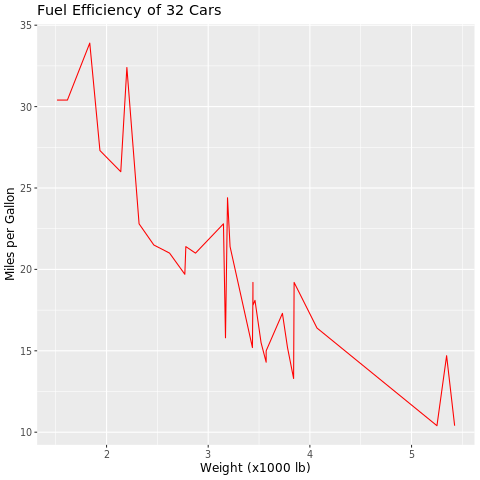

In [7]:
[rgraph|
  ggplot(mtcars, aes(x=wt, y=mpg)) + 
  ggtitle("Fuel Efficiency of 32 Cars") +
  xlab("Weight (x1000 lb)") + ylab("Miles per Gallon") +
  geom_line(linetype="solid", color="red", size=0.5) +
  theme(text=element_text(family="Ariel", size=12)) |]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3de1xUdf4/8M+5zI3hMshFEEVSE01dQLwl3sryt7ZJi5mCmqaSdlOzr7uWbdoWatpFzMrU1rSbhuVaq+Vu20VTbLG8JYp5QxTiKgjMMPfz++PgiDDiwMycc+bM6/nwjwHmnM/nzJx5+ebNzOdQHMcRAACQHlrsCQAAgHMIaAAAiUJAAwBIFAIaAECiENAAABKFgAYAkCgENACARCGgAQAkCgENACBRCGgAAIlCQAMASBQCGgBAohDQAAASxXp17waDwW63u3hnlUplMpm8Op9mGIax2WwCj0jTtMViEXJQlmWtVquQIyqVSqvV6vpT7z6KoiiKEnhEpVIp8Bkr/FPJsiwhxPVBAwMDvTkdv+PdgDaZTC4mIEVRgYGBV69e9ep8mtFoNCaTScgFV9VqNU3TRqNRsBEJIVqtVuAR1Wq11Wo1m82CjciyLMMwQsYlwzAajUb2T2VAQABFUa4PioD2LLQ4AAAkCgENACBRCGgAAIlCQAMASBQCGgBAohDQAAAShYAGAJAoBDQAgEQhoAEAJAoBDQAgUQhoAACJQkADAEgUAhoAQKIQ0AAAEuXWcqPnz59/+eWX+dvV1dUrVqzo3bu3J2YFAADuBXS3bt3ef/99Qkhtbe3cuXPj4+M9NCsAAPBQiyM3N3fw4ME0jYYJAIDHeOaKKvv37584caLjy+zs7C+//JIQsmnTpq5du7q+n7CwMI/Mx3UBAQECj8hfKkngQdVqtZDDURQVFBQk5Ig8IS/n8aveEH/wZ6uAl+MRS1nKoDBhzx9woNy/4NPVq1fnz5+/adMmRwVdU1Oj1+vJtSs8uTQPitLpdNXV1W5Opk1UKpXZbBbyklcqlYplWf7BEYxGo2loaBByxKCgIKPRKOSlFxmGYRhGyItsPXLxco+gwKlaQf+DV6vVwl+9LE6tMrp8/oSGhnp1Pv7GAxV0y/6GTqfT6XSEkOrqatevSUgIEfgSrhzH2Ww2IQPabrfzgwo2Irl2mEKOSAix2+1CDspfNFawEQuMpu/r6jf27knX1QkzIk+rUuqtgl5xOECpIGKcP8DzQNd4//79w4YNc38/AL5iZXnlnPCwcIVC7ImAzLkb0DU1NcXFxX379vXIbACkr8Bo2qs3zAnH7/Lgde62OHQ63ebNmz0xEwDfsLK88tEOoWGsZ/7ADtAKvDEOoA1QPoOQENAAbcCXzx0YRuyJgF9AQAO4CuUzCAwBDeAqlM8gMAQ0gEtQPoPwENAALkH5DMJDQAPcGspnEAUCGuDWUD6DKBDQALeA8hnEgoAGuAWUzyAWBDRAa1A+g4gQ0ACtQfkMIkJAA9wUymcQFwIa4KZQPoO4ENAAzqF8BtEhoAGcQ/kMokNAAziB8hmkAAEN4ATKZ5ACBDRAcyifQSIQ0ADNoXwGiUBAA9wA5TNIBwIa4AYon0E6ENAA16F8BklBQANch/IZJAUBDdAI5TNIDQIaoBHKZ5AaBDQAISifQZIQ0ACEoHwGSUJAA6B8BolCQAOgfAaJQkCDv0P5DJKFgAZ/h/IZJIv16t6VSiXHca7ck6IoQoharfbqfJpRKBSEEBdn6KkRGYYR+DCFH5GiKIVCQdPC/fdP0zRN0/xZ1CanGox79Ya3unVVs217LfDDyf6pZFlW+MMEB+8GtNVqtdvtrtyTf2lZLBavzqcZhmEsFouQAc2/qgU+TJZlBR5RrVbbbDYhB2UYhn8227rhy5dL5oSHBXNcW7dlGIYIfsYK/1SyLEsEP0xw8G5A2+12m83myj35gHbxzp7CT0/IgLbb7RzHCXyYwo9I2vLUewRFURRFtXXEAqPph3r9a506tm+q/vBU2u32djyw4CnoQYP/QvcZJA4BDX4Kb94A6UNAg59C+QzSh4AGf4TyGXwCAhr8Ecpn8AkIaPA7KJ/BVyCgwe+gfAZfgYAG/4LyGXwIAhr8C8pn8CEIaPAjKJ/BtyCgwY+gfAbfgoAGf4HyGXwOAhr8Bcpn8DkIaPALKJ/BFyGgwS+gfAZfhIAG+UP5DD4KAQ3yh/IZfBQCGmQO5TP4LgQ0yBzKZ/BdCGiQM5TP4NMQ0CBnKJ/BpyGgQbZQPoOvQ0CDbKF8Bl+HgAZ5QvkMMoCABnlC+QwygIAGGUL5DPKAgAYZQvkM8oCABrlB+QyygYAGuUH5DLKBgAZZQfkMcoKABllB+QxygoAG+UD5DDLDurl9ZWXl6tWri4qKgoKCsrOzlUqlR6YF0A4on0Fm3A3oNWvWjBw5csyYMZWVlQxeGCCeUw3GvXrD6zFRYk8EwGPcCuiysrLy8vIxY8YQQsLDwz00JYD2WP57GcpnkBm3Avr3338PDw9fsWJFWVnZ4MGDMzIy+O8XFBRcvnyZEJKQkKBWq13ZFUVRhBCVSuXOfNqKZVmBezIKhYKmaYEPk2EYgUekKEqhUPDPqTBOm8zf19Vn94lXse7+UugimqYpipL9U8myLBH8hQkObp3NNpvt9OnTa9asiYiIWLJkSXx8fP/+/QkhR48e3bdvHyGkd+/eOp3O9R26mOaeQtM0TQv6Z1L+VS3wYTIMI2RWEkJomlYoFKxQWUkI+bi0fEbHyJjAQMFGpCjKH55Kvm8p8KDg4NZLKDw8PCYmJiYmhhCSlJRUWFjIB3R6enp6ejohpLq6+urVq67siqKosLAwF+/sKRqNxmg0chwn2IhqtVqhUNTV1Qk2IiFEq9Xq9XohR9TpdAaDwWw2Czbi99VXX+gUJeT5wzBMSEiIwGes8E9lQEAARVGuD4pWp2e5VT/Gxsba7fbKykq73Z6fn9+lSxdPTQvAdbU2+ymjcUigVuyJAHiYWxU0RVGzZ89eunSpzWYbMGDAwIEDPTUtANfl6g39NOpghjZZxZ4KgEe52yXs16/f22+/7ZGpALRPrsEwDOUzyBE+SQg+74C+IUWLgAYZQkCDb6u12QtMpsHaALEnAuB5CGjwbbl6Q1+1KpjBmQwyhNMafFuuwZCC8hlkCgENvu2AvmFoAAIa5AkBDT6Mb0APCtCIPREAr0BAgw9DAxrkDWc2+DA0oEHeENDgw9CABnlDQIOvQgMaZA8BDb4KDWiQPZzc4KvQgAbZQ0CDr0IDGmQPAQ0+qdZmLzCaBqMBDbKGgAaflKs39NWogtCABlnD+Q0+CQ1o8AcIaPBJaECDP0BAg+9BAxr8BAIafA8a0OAncIqD70EDGvwEAhp8DxrQ4CcQ0OBj0IAG/4GABh+DBjT4D5zl4GPQgAb/gYAGH4MGNPgPBDT4EjSgwa8goMGXoAENfgUnOvgSNKDBryCgwZegAQ1+BQENPgMNaPA3CGjwGWhAg7/BuQ4+Aw1o8DcIaPAZaECDv2G9une1Wu3iPSmKIoRotVpvTqc5lmUZhuE4TsgRaZoW+DAVCoXAI9I0rVarFQqFB/dZa7OfNpnvCg/TsozTESmKYlnvns9NURRFUZTsn0r+SRR4UHDw7gltNBptNpsr96QoSq1W6/V6r86nGY1GYzQahQxoPrYEPkytVivwiAqFwmg0ms1mD+7zm9r6PmolYzLqTU5+yv9fazI5+5l3MAyjVCpl/1QGBARQFOX6oBoN/oTrSWhxgG9AAxr8EAIafAMa0OCHENDgA/AOaPBPCGjwAXgHNPgnnPHgA9CABv+EgAYfgAY0+CcENEgdGtDgtxDQIHVoQIPfwkkPUocGNPgtBDRIHRrQ4LcQ0CBpaECDP0NAg6ShAQ3+DOc9SNoBPRrQ4L8Q0CBpB/QGNKDBbyGgQbqu2mynzWY0oMFvIaBBunL1DX3VaECD/8KpD9KViwY0+DcENEgXGtDg5xDQIFFoQAMgoEGi0IAGwNkPEoUGNAACGiQKDWgABDRIERrQAAQBDdKEBjQAQUCDNKEBDUAQ0CBNaEADEAQ0SBAa0AA8BDRIDhrQADy8BkBy0IAG
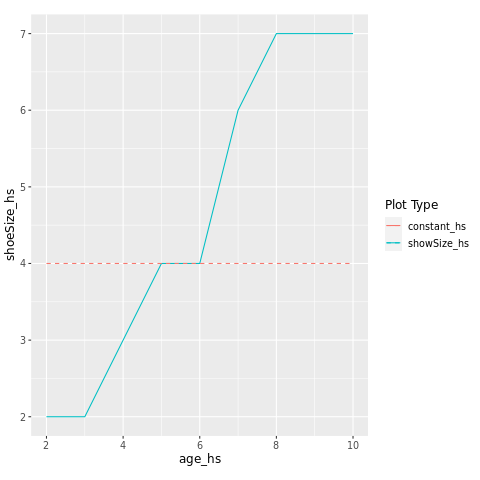

In [5]:
[rgraph|
  d <- data.frame(age_hs,shoeSize_hs,constant_hs)
  ggplot(d, aes(age_hs)) + 
  theme(text=element_text(family="Ariel", size=12)) +
  geom_line(aes(y = shoeSize_hs, color = "showSize_hs")) + 
  geom_line(aes(y = constant_hs, color = "constant_hs"), linetype="dashed") +
  coord_fixed(ratio=2) +
  labs(color = "Plot Type") |]

Put this below labs to change legend size? <br>
guides(color = guide_legend(override.aes = list(size = 5)))

In [6]:
let patients = 1000 -- Patient count (limited to 10^6)
let infectionRates = [0.001,0.005..0.4]
let bkevens = take (length infectionRates) (repeat 1000.0)
let (tests,iRates) = unzip $ hermanPlotData patients infectionRates

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3dd2AT5f8H8OeymzRdSUNLd2nZWDYoIIhUEWSDlAKigIAgIioIKDJkCOoXVEQFt+iPoQgogoIyZAhVgSJYdks3HWmz9/3+SGlLR9qmae6Svl9/JZcbn7tc3r0+Nx6KpmkCAADsw2G6AAAAqBkCGgCApRDQAAAshYAGAGApBDQAAEshoAEAWAoBDQDAUghoAACWQkADALAUAhoAgKUQ0AAALIWABgBgKQQ0AABLIaABAFgKAQ0AwFIIaAAAlkJAAwCwFAIaAIClENAAACyFgAYAYCkENAAASyGgAQBYCgENAMBSCGgAAJZCQAMAsBQCGgCApRDQAAAshYAGAGApBDQAAEshoAEAWAoBDQDAUghoAACWQkADALAUAhoAgKUQ0AAALIWABgBgKQQ0AABLIaABAFgKAQ0AwFIIaAAAlkJAAwCwFAIaAIClENAAACyFgAYAYCkENAAASyGggV0mTZqUlJTU+Pm8/fbbbdu2rfEjmqaff/55hUJBUdT27dsbv6w6NcUSXbWhgM0Q0Oyl0WioWtQWPQ4kJSVNmjTJiTJmzZplXyiXyw0LCxs/fvzNmzedmE89Pfjgg/3792+6+RNCDh069PHHH+/fv1+pVI4ZM6Yxs5o1a1bHjh3dsMTqX5/LN5TTX7TTuxbUicd0AVArsVh87tw5++sjR468+OKLv/zyi0KhIISIRCJ3VhIfH79v3z6apm/fvr148eJhw4ZdunSpiZY1Y8aMGocbDAZXrfXVq1dDQkJ69OjRoKkaU4BzS3Sstg3VGO78oqFeaPAEP/zwAyEkMzOzfMjHH3/crl07oVDYqlWrZcuWGY1G+/DDhw/36NFDLBZLpdLOnTsfP36cpulp06ZV/tJ//PHH2sasbubMmR06dCh/+8033xBCMjIy6qzEZDLNnTs3MDDQz8/v6aefXr58eZs2bewf9erV69VXXy2fw9q1a8sXMXHixPHjx9tfjxgx4sknn3zhhRdCQ0MVCoXTi6usygEsTdMWi+X1118PDw/n8/lt2rT57LPPykeusYDaNs6IESOmTJmyYMGC8PDwoKCg5OTk0tLSGpfoYC3sH3Xo0EEgEMjl8pEjR5rN5hq/vsobyvEq1FiV43Whq33R+/bt69u3r33z9u3b9+TJk/bhNdbmYAXrudeBHQLaM1QJ6Lfeeqtly5a7d+++ffv277//Hh8fv3DhQpqmDQaDr6/v0qVLMzMzMzIy9u7dm5KSYp9k/PjxEydOLJ+hgzGrqPy7zcrKGjp0KCEkNzfXcSU0TS9evFgmk/3444/p6ekrVqzw9fV1IqD5fP7atWt1Op1KpapzcUFBQXv37k1PT3/99dcrL66KDRs2REVFlb9dvny5v7//jh07bty48c4773C53D179tRWgIONYx9506ZNZrM5Ly+vTZs2CxYsqHGJDtZi7dq1Pj4+77777vXr11NTU9966y2TyURX+/qqbKg6V6HGqhysS/Uv+ptvvtm5c+e1a9euXLkyb948Pz+//Px8+0fVa3Ni/4QaIaA9Q+WANpvNAQEB27dvr/ypn58fTdM5OTmEkPKjm8qq/IocjFnFzJkzCSFcLpfDKTtj8fTTT9s/clCJ2WyWSCQffPBB+UcDBgxwIqA7depUPlqdi3v33XfLP+rbt299AtpisUgkkrfeeqv80+Tk5B49etRYQI0bp3JA9+7du/yjNWvWdO7cufoSHayF0WiUSqUrV66sviAHAV3nKtRWVfV1qe2Lri46OvqLL76osTbn9k+oEU4Sep5r166VlJQkJSWVnzMcNWqUSqUqLCwMDQ2dOHHiQw89NHjw4PXr11+7dq22mdR/TEJIXFzc+fPnU1JSVq9enZCQsHHjxjorycjI0Gq1ffr0KZ9J5df1d99999Vnxe2L69evX/nIlV87UH3CBx988PLlyzUWUKfKJ2+Dg4Pz8/Orj+NgLa5fv65WqwcNGlT/JdZnFepTlV1tXzQhJCsra86cOV26dAkLCwsJCcnOzs7IyKhxJi7ZP8EOAe15bDYbIaR6451cLieEbNu27cyZMwMHDvz111/bt2+/bdu22uZT/zGFQmHHjh27du26ZMmS+++/f8qUKfWpxIHyYzQ7q9Va25iVz8vVuTg+n18+skAgcFxDbexLqbGAOnG5XAezqjzQwVrQNN3gomtaRIOqsqvtiyaEDBky5MaNG++9996pU6fOnz/funVrk8nkYOmN3z+BIKA9UXx8vJ+f3+7du2sboXPnzgsXLjx8+HBycvJnn31mHygQCCwWS33GdOzVV1/dv3//r7/+6riSqKgoiURy8uTJ8iGVXysUioKCgvK3aWlp9Vl0nYu7cOFC+ZDz58/XZ55RUVG+vr5//PFH+ZDjx4936NChPtM6x8Fa2D86fPhw9Y9q/PrsmmgVKn/Rd+7cuXjx4htvvNGvX7+oqCipVFr58LlKbc7tn1AjXGbneQQCweuvv75o0aLAwMAxY8ZwOJwLFy6cOXNmw4YNly9f/vbbb4cNGxYeHp6VlXXmzJlHHnnEPlVsbOy333577dq1wMBAf3//a9eu1TamY+Hh4RMmTFiyZEliYqKDSng83rx5815//fWwsLCOHTt+/fXXf//9d8uWLe0zeeSRR1asWLFw4cLY2Nh9+/b98MMP0dHRjVlx++JWrlzZr1+/yMjIffv2HThwICYmps55crncBQsWrFq1KiwsrHv37nv27Nm5c6eDcGk8B2vB5/MXL168cuVKf3//xx57zGAw/PLLLy+88AKfz6/y9VX+X6GJVqHyFy2TyWQy2YEDB3r06GEwGGbPnm0wGMrHrFKbc/sn1KyxjdjgFtUvs/vyyy+7dOkiFAoDAgJ69uy5efNmmqYzMjIef/zx0NBQgUAQFhY2Z84crVZrHz83N3fQoEFSqZQQ8uOPPzoYs4oqV1/RNH3x4kWKonbt2uWgEpqmjUbj3LlzAwICpFLpk08+Wfm6N6PR+NxzzwUHBysUiieffHLx4sW1nSScNm1alXocLy4wMDA8PHzkyJELFy6s51Ucjq9Rq15AbRunyshbt25t0aJFjUt0sBY0TW/evLlt27Z8Pj84OHjUqFFms5mu9vXRDbnMrraqHKyLXeUv+ujRowkJCaGhoXFxcevXr698mrd6bbWtYP33OrCj6EY3eAHUx9tvv/3JJ5/UszUDAAjaoAEAWAsBDQDAUmjiAABgKRxBAwCwFAIaAIClENAAACyFgAYAYCkENAAAS7HxVm+lUung6Tm1kcvlRUVF7LkoRSQSmUwmBw+mcTOhUCgSiUpLS5kupIJEItFqtUxXUUEqlZrN5so3MTOLoiiRSKTX65kupIJcLi8uLmbPXi0SicxmsxNx0UQEAoGPj4/TvzKxWCwWiysPwRE0AABLIaABAFgKAQ0AwFIIaAAAlkJAAwCwFAIaAIClENAAACyFgAYAYCkENAAASyGgAQBYCgENAMBSCGgAAJZCQAMAuICZpncUl/Q4/+8Fvcuet8XGp9kBALCcxmY7odGZSNnjM9ONpk+LS4L5/JfCW7bnc121FAQ0AEB9WWj6qEa3q0R1UK1pIxT4ccuyOIDL2RQW+nBQQGMeN1odAhoAoG7FFuuXytJPi5R+XM64AP/XWsgjBPymXigCGgCgqkyzpdhisb820eT7UtUOZWl/X8mnkS17iX3cVgYCGgCaO53N9p/BeMlgvGw0XdIb/jOaLDQt55U1X1CEDJT6/h4XHdP0h8xVIKABoHnJNJl/UmnyLJZCi7XAYk43mW+bLRF8XgeRqL1IMFMW2NFHFMnncyimC0VAA0DzobRYNxQWfV1cmiiVRAkECT5CGVccJeC3FQl9OWy85rixAb1mzZrU1NTOnTsvWrTIPmTcuHG+vr6EkLZt277yyiuEkJSUlC1bttA0nZycPHDgwBqHAAA0
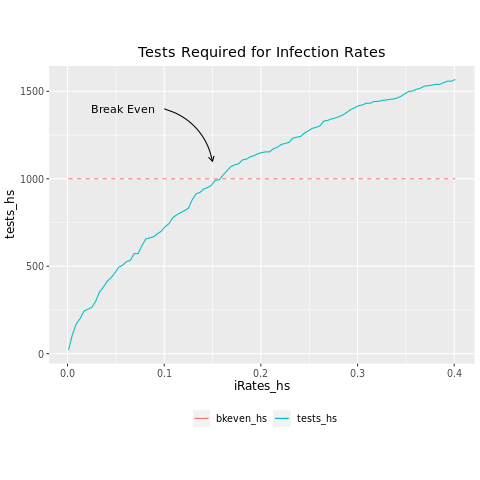

In [7]:
[rgraph|
  d <- data.frame(iRates_hs,tests_hs,bkevens_hs)
  ggplot(d, aes(iRates_hs)) + 
  ggtitle("Tests Required for Infection Rates") + theme_grey() +
  theme(text=element_text(family="Ariel", size=12),
            legend.title=element_blank(),
            plot.title = element_text(hjust = 0.5),
            legend.position="bottom", aspect.ratio=0.7) +
  geom_line(aes(y = tests_hs, color = "tests_hs")) + 
  geom_line(aes(y = bkevens_hs, color = "bkeven_hs"),
            linetype="dashed") +
  labs(color = "Plot Type") +
  annotate( geom = "curve", x = 0.1, y = 1400,
        xend = 0.15, yend = 1100, 
        curvature = -.3, arrow = arrow(length = unit(2, "mm"))) +
  annotate(geom = "text", x = 0.09, y = 1400,
        family = "ariel", label = "Break Even", hjust = "right") |]

> <span style='background :#E0E0E0'>
    Background color is great
       and even more awesomeand even more awesomeand even awesome and even more awesomeand even more awesomeand even more awesome and even more awesomeand even more awesomeand even more awesomeand even more awesomeand even more awesome
</span>

>> <div style='background :#E0E0E0'>
    Background color is great
       and even more awesomeand even more awesomeand even awesome and even more awesomeand even more awesomeand even more awesome and even more awesomeand even more awesomeand even more awesomeand even more awesomeand even more awesome
</div>


> <pre><div  style='background :#E0E0E0'>alarm            =>  2.965  percent
burg             =>  9.991  percent  
burg and alarm   =>  0.2976 percent
alarm given burg =>  2.979  percent
burg given alarm =>  10.04  percent
</div></pre>